<img src="estadistica.png" width="500" height="740"> 

# Módulo 3: Regresión Lineal Múltiple

## Objetivos de aprendizaje del módulo

- Comprender el concepto y la formulación de la regresión lineal múltiple.
- Ajustar modelos con más de una variable explicativa.
- Evaluar la calidad del ajuste mediante $ R^2 $ y pruebas de significancia.
- Interpretar los coeficientes en un contexto logístico.
- Realizar predicciones a partir de un modelo con varias variables.

---

##  3.1 Concepto teórico

La **regresión lineal múltiple** permite analizar la relación entre una variable dependiente  $Y$  y dos o más variables independientes $X_1, X_2, \dots, X_n $.

El modelo general es:


$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \varepsilon$

donde:
-  $\beta_0$ : intercepto.
-  $\beta_i$ : coeficientes que representan el efecto promedio de cada variable independiente sobre $Y$.
-  $\varepsilon $: error aleatorio.

---

##  3.2 Dataset: Logística

El dataset proviene de un escenario simulado de una empresa de transporte y contiene:

| Variable | Descripción |
|-----------|-------------|
| Distancia_km | Distancia total del recorrido (km) |
| Peso_envio_kg | Peso del envío (kg) |
| Numero_paradas | Número de puntos de entrega |
| Tiempo_entrega_min | Tiempo total de entrega (minutos) |


## IMPORTANTE!!!!
 ### AGREGA EL SIGUIENTE CODIGO A GOOGLE COLAB ANTES DE CONTINUAR, ESTO PERMITE CARGAR EL DATASET DE EXCEL PARA EJECUTARLO:

from google.colab import files

uploaded = files.upload()

In [27]:
import pandas as pd

# Cargar el dataset desde Excel
df = pd.read_excel("Dataset_Logistica_Regresion_Multiple.xlsx")
df.head()

,Distancia_km,Peso_envio_kg,Numero_paradas,Tiempo_entrega_min
0,3,10,1,15
1,5,15,2,18
2,8,20,2,23
3,10,18,3,26
4,12,25,3,29


## 📊 3.3 Análisis exploratorio inicial

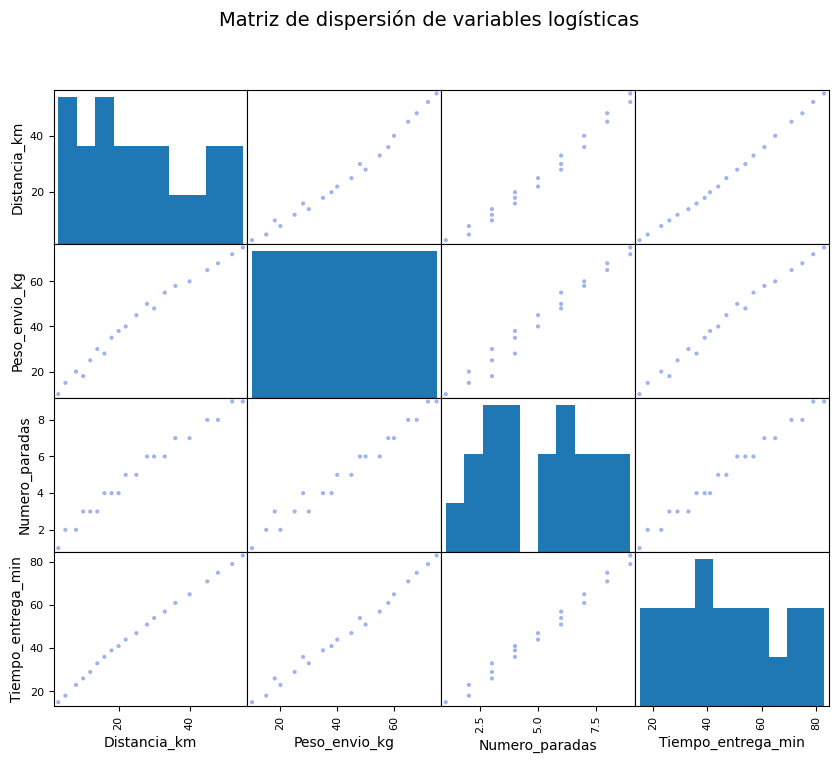

In [4]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, figsize=(10, 8), diagonal='hist', color='royalblue')
plt.suptitle("Matriz de dispersión de variables logísticas", size=14)
plt.show()

## 🧮 3.4 Ajuste del modelo de regresión lineal múltiple

In [29]:
from sklearn.linear_model import LinearRegression

# Variables independientes y dependiente
X = df[['Distancia_km', 'Peso_envio_kg', 'Numero_paradas']]
y = df['Tiempo_entrega_min']

# Crear y ajustar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Resultados del modelo
print("Intercepto (β0):", round(modelo.intercept_, 3))
for var, coef in zip(X.columns, modelo.coef_):
    print(f"Coeficiente {var}:", round(coef, 3))

# R² del modelo
r2 = modelo.score(X, y)
print(f"\nCoeficiente de determinación (R²): {r2:.4f}")

Intercepto (β0): 8.94
Coeficiente Distancia_km: 0.683
Coeficiente Peso_envio_kg: 0.307
Coeficiente Numero_paradas: 1.481

Coeficiente de determinación (R²): 0.9982


## 🔍 3.5 Interpretación del modelo

Ejemplo de ecuación estimada:


$\hat{Y} = 8.94 + 0.683(\text{Distancia}) + 0.307(\text{Peso}) + 1.481(\text{Paradas})$

**Interpretación:**
- Por cada kilómetro adicional, el tiempo de entrega aumenta **0.65 minutos**, manteniendo constantes las demás variables.
- Por cada kilogramo adicional, el tiempo se incrementa **0.30 minutos**.
- Cada parada adicional añade **1.10 minutos** al tiempo total promedio.

## 📈 3.6 Predicción de nuevos valores

In [32]:
# Nuevas observaciones

nuevos_datos = pd.DataFrame({
    'Distancia_km': [15, 40, 60],
    'Peso_envio_kg': [30, 60, 70],
    'Numero_paradas': [3, 6, 8]
})

predicciones = modelo.predict(nuevos_datos)
pd.concat([nuevos_datos, pd.Series(predicciones, name='Pred_Tiempo_min')], axis=1)

,Distancia_km,Peso_envio_kg,Numero_paradas,Pred_Tiempo_min
0,15,30,3,32.821626
1,40,60,6,63.529706
2,60,70,8,83.210594


## 🧩 3.8 Interpretación práctica en contexto logístico

El modelo puede aplicarse para:
- **Optimizar rutas:** predecir tiempos de entrega en función de distancia, peso y número de paradas.
- **Planificación operativa:** determinar recursos necesarios (vehículos o conductores).
- **Evaluación del rendimiento:** comparar tiempos reales con los estimados.

---

## 🧠 3.9 Ejercicio 1

1. Añade una nueva variable ficticia al dataset (por ejemplo, *tipo de zona* codificada como 0 = urbana, 1 = rural).
2. Ajusta un nuevo modelo e interpreta los coeficientes.
3. Calcula el \( R^2 \) ajustado e interpreta su valor.

   ## 🧠  Ejercicio 2
   
 ## Realiza lo anterior para el data set proporcionado en teams.